> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate No-call No-show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This report is part of the Investigate a dataset project for the Udacity Nanodegree program. The dataset I chose to the investigate is a collection of data from over 100,000 appointments in Brazil, and whether or not patients attend their appointments. The main questin I was looking to answer, is: what are the most important factors that determine whether a patient will no-show? 

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
## Data Wrangling

First, we will take a look at the quality of the data. 

### General Properties

In [52]:
# Create a tuple of dimesnsion of the Dataframe

df.shape

(110527, 14)

In [53]:
# Datatypes of the Columns 

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [54]:
# Concise Summary of the dataframe and view of the non-null values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


All columns have the same amount of non-null values meaning we have no, non-null values.  

In [55]:
df.nunique()
#return the number of the unique values 

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Overall, everything looks good. We have the same number of the appointment ID's as rows, so no duplicates there. Furthermore, gender has two unique values and so does 'No-show.'

However, there are 115 unique ages, which seems a bit odd and worth digging into. 

In [56]:
#List unique values in the name column 

df.Age.unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

The array shows some unrealistic ages and numbers like -1. 

In [57]:
#Drop row with -1

df = df.drop(df.index[df.Age == -1])
df.shape

(110526, 14)

81 unique neighborhoods sounds like a lot, let's double-check 

In [58]:
sorted(df.Neighbourhood.unique())

['AEROPORTO',
 'ANDORINHAS',
 'ANTÔNIO HONÓRIO',
 'ARIOVALDO FAVALESSA',
 'BARRO VERMELHO',
 'BELA VISTA',
 'BENTO FERREIRA',
 'BOA VISTA',
 'BONFIM',
 'CARATOÍRA',
 'CENTRO',
 'COMDUSA',
 'CONQUISTA',
 'CONSOLAÇÃO',
 'CRUZAMENTO',
 'DA PENHA',
 'DE LOURDES',
 'DO CABRAL',
 'DO MOSCOSO',
 'DO QUADRO',
 'ENSEADA DO SUÁ',
 'ESTRELINHA',
 'FONTE GRANDE',
 'FORTE SÃO JOÃO',
 'FRADINHOS',
 'GOIABEIRAS',
 'GRANDE VITÓRIA',
 'GURIGICA',
 'HORTO',
 'ILHA DAS CAIEIRAS',
 'ILHA DE SANTA MARIA',
 'ILHA DO BOI',
 'ILHA DO FRADE',
 'ILHA DO PRÍNCIPE',
 'ILHAS OCEÂNICAS DE TRINDADE',
 'INHANGUETÁ',
 'ITARARÉ',
 'JABOUR',
 'JARDIM CAMBURI',
 'JARDIM DA PENHA',
 'JESUS DE NAZARETH',
 'JOANA D´ARC',
 'JUCUTUQUARA',
 'MARIA ORTIZ',
 'MARUÍPE',
 'MATA DA PRAIA',
 'MONTE BELO',
 'MORADA DE CAMBURI',
 'MÁRIO CYPRESTE',
 'NAZARETH',
 'NOVA PALESTINA',
 'PARQUE INDUSTRIAL',
 'PARQUE MOSCOSO',
 'PIEDADE',
 'PONTAL DE CAMBURI',
 'PRAIA DO CANTO',
 'PRAIA DO SUÁ',
 'REDENÇÃO',
 'REPÚBLICA',
 'RESISTÊNCIA',
 'RO

Looks like there is in fact 81 different neighborhoods. 

In [59]:
total = len(df.index) 
print('Total = ', total)
noshow = (df['No-show'] == 'Yes').sum()
print('The now-show percentage = ', int((noshow / total) * 100), '%')


Total =  110526
The now-show percentage =  20 %


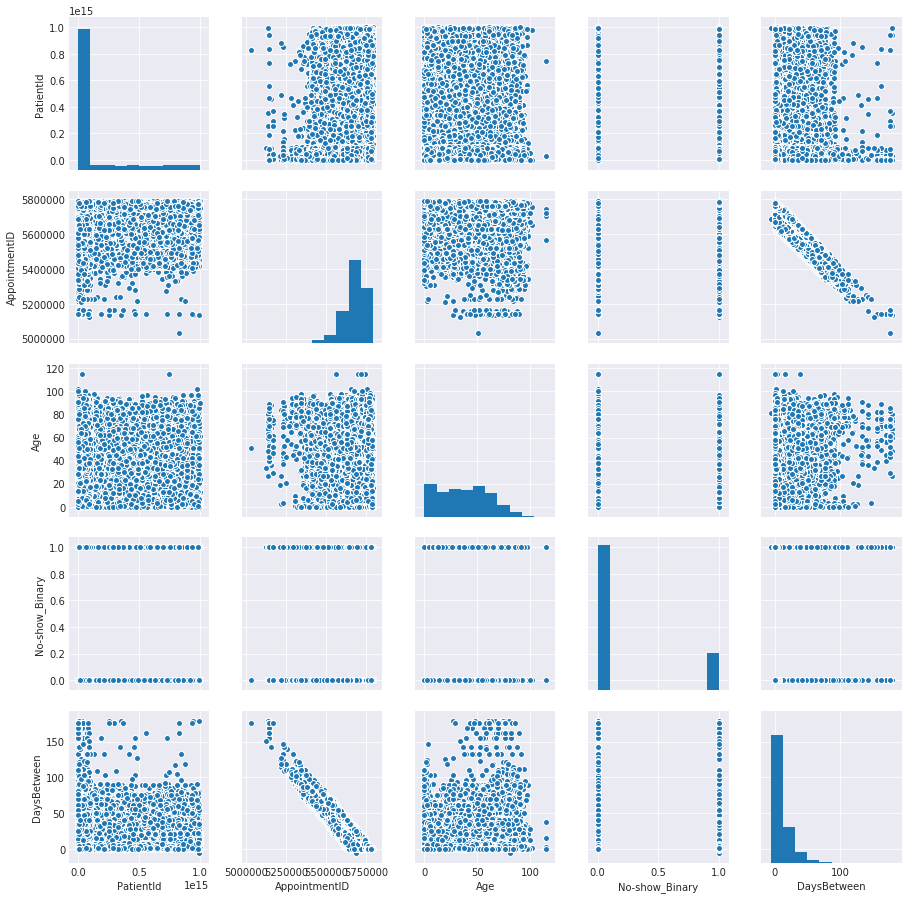

In [89]:
sns.pairplot(df);

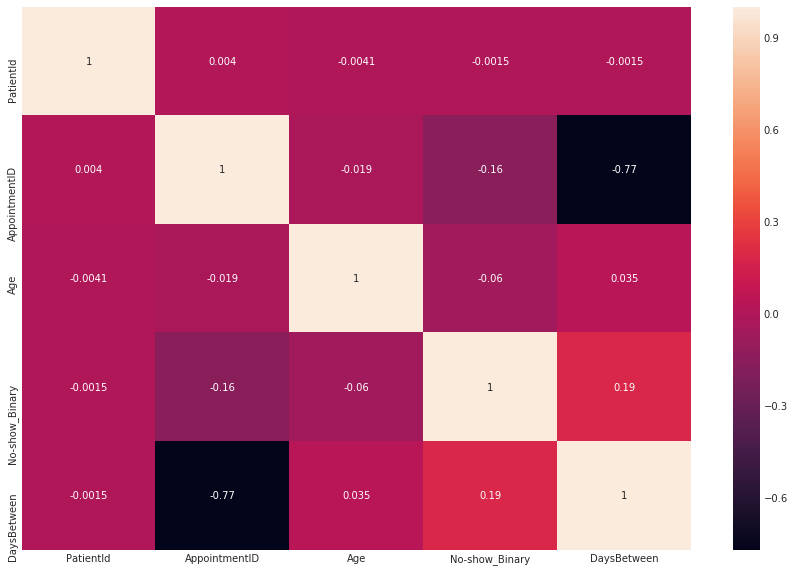

In [91]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), ax=ax, annot=True);

Looking at the heatmap above, it seems like there is some degree of corrolation between Age and Hypertension, and to a less extent, between Hypertension and Diabetes. In the next sections, we will perform more indepth analysis to confirm our preliminary findings.

### How Does gender influence no show percentage? 

In [60]:
# Function prints a one-dimensionals analysis of variable

def analysis_variable(column_name, value, specific_text):
    total = len(df.index)
    total_value = (df[column_name] == value).sum()
    percentage = int((total_value / total) * 100)
    text = ' This is ' + str(percentage) + '% of ' + str(total) + ' records. '
    print(str(total_value) + '' + specific_text + text)

analysis_variable('Gender', 'M',' of the appointments are for a man.')
analysis_variable('Gender', 'F',' of the appointments are for a man.')

38687 of the appointments are for a man. This is 35% of 110526 records. 
71839 of the appointments are for a man. This is 64% of 110526 records. 


In [61]:
def noshow_percentage(column_name, value, text):
    total = (df[column_name] == value).sum()
    noshow = len((df[(df[column_name]==value) & (df['No-show'] == 'Yes')]))
    print(int((noshow / total) * 100), text)

In [62]:
noshow_percentage('Gender', 'M', '% of all appointments with a man is a no show')
noshow_percentage('Gender', 'F', '% of all appointments with a man is a no show')


19 % of all appointments with a man is a no show
20 % of all appointments with a man is a no show


The data shows gender is not an important factor. Though the data is certainly skewed towards women (65% to 35%) the no-show rate is still about equal. 

### How does Disease:  hipertension, diabetes and alcoholism affect no-show percentage?



In [63]:
analysis_variable('Hipertension', 1, ' of the appointments involves a patient with hipertension.')
analysis_variable('Diabetes', 1, ' of the appointments involves a patient with hipertension.')
analysis_variable('Alcoholism', 1, ' of the appointments involves a patient with hipertension.')


21801 of the appointments involves a patient with hipertension. This is 19% of 110526 records. 
7943 of the appointments involves a patient with hipertension. This is 7% of 110526 records. 
3360 of the appointments involves a patient with hipertension. This is 3% of 110526 records. 


In [64]:
noshow_percentage('Hipertension', 1, '% of all appointments with someone with hipertension is a no show')
noshow_percentage('Diabetes', 1, '% of all appointments with someone with diabetes is a no show')
noshow_percentage('Alcoholism', 1, '% of all appointments with someone with alcoholism is a no show')

17 % of all appointments with someone with hipertension is a no show
18 % of all appointments with someone with diabetes is a no show
20 % of all appointments with someone with alcoholism is a no show


In [65]:
analysis_variable('SMS_received', 1, 'of the appointments involves a patient who received an SMS.')
noshow_percentage('SMS_received', 1, '% of all appointments with someone who received an SMS is a no show')


35482of the appointments involves a patient who received an SMS. This is 32% of 110526 records. 
27 % of all appointments with someone who received an SMS is a no show


Surprisingly, the no-show rate for hipertension and diabetes is lower than the population average. Alcoholism has no affect on no-show rate.   

### Are people who received an SMS more likely to show up?


In [66]:
analysis_variable('SMS_received', 1, 'of the appointments involves a patient who received an SMS.')

noshow_percentage('SMS_received', 1, '% of all appointments with someone who received an SMS is a no show')


35482of the appointments involves a patient who received an SMS. This is 32% of 110526 records. 
27 % of all appointments with someone who received an SMS is a no show


35,482 appointments involved someone who recieved an SMS beforehand. And of those, 27% of people who no-showed. That is quite a significant difference compared to the average. 

### Clean Up

Drop some unnecessary columns to make the dataset easier to work with. 

In [67]:
df.drop('Scholarship', axis=1, inplace=True)
df.drop('Hipertension', axis=1, inplace=True)
df.drop('Diabetes', axis=1, inplace=True)
df.drop('Alcoholism', axis=1, inplace=True)
df.drop('Handcap', axis=1, inplace=True)
df.drop('SMS_received', axis=1, inplace=True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No


In [68]:
#It is easier to calculate with 1 and 0 than yes and no
df['No-show_Binary'] = df['No-show'].replace(('Yes', 'No'), (1.0, 0.0))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,No-show_Binary
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,0.0
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,0.0
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,0.0
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0


### How does age influence no-show percentage?  

First, group ages together in bins of 5 years. Then plot no-show percentag in relation to the age bins.

In [69]:
#create age-bins
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100, 105, 110, 115, 120]
df['Agebins'] = pd.cut(df['Age'], bins)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,No-show,No-show_Binary,Agebins
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,0.0,"(60, 65]"
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0,"(55, 60]"
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,0.0,"(60, 65]"
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,0.0,"(5, 10]"
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,0.0,"(55, 60]"


Text(0.5,0,'Patient age range')

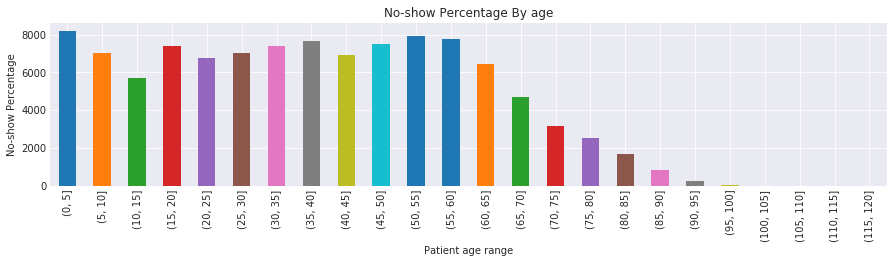

In [70]:
df_age = df[['No-show_Binary', 'Agebins']].groupby('Agebins').count()
# df_age.head(23)
plot_title = 'No-show Percentage By age'
ax = df_age['No-show_Binary'].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show Percentage')
ax.set_xlabel('Patient age range')

Sample size means we can ignore ages 90+

In [71]:
# Because of the sample size we can ignore ages > 90

df_age = df
df_age = df_age.drop(df_age.index[df_age.Age >90])
df_age.drop('Agebins',axis=1, inplace=True)
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
df_age['Agebins'] = pd.cut(df_age['Age'], bins)

Text(0.5,17.2,'Patient age by 5 year increments')

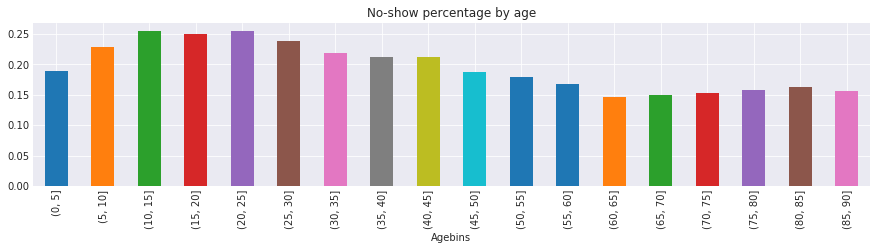

In [72]:
df_age = df_age[['No-show_Binary', 'Agebins']].groupby('Agebins').mean()
plot_title = 'No-show percentage by age'
x = df_age['No-show_Binary'].plot(kind='bar', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Patient age by 5 year increments')

After young infancy, no-shows slowly increase until 20-25 and then slowly decline until it reaches the minimum. The peak age for no shows is 20-25. 

### What is the influence of the neighborhood and no-show percentage?

In [73]:
# Examine sample ize difference between neighborhoods 

df_neighbourhood = df[['No-show_Binary', 'Neighbourhood']].groupby('Neighbourhood')['No-show_Binary'].count()
df_neighbourhood.head(40)

Neighbourhood
AEROPORTO                         8
ANDORINHAS                     2262
ANTÔNIO HONÓRIO                 271
ARIOVALDO FAVALESSA             282
BARRO VERMELHO                  423
BELA VISTA                     1907
BENTO FERREIRA                  858
BOA VISTA                       312
BONFIM                         2773
CARATOÍRA                      2565
CENTRO                         3334
COMDUSA                         310
CONQUISTA                       849
CONSOLAÇÃO                     1376
CRUZAMENTO                     1398
DA PENHA                       2217
DE LOURDES                      305
DO CABRAL                       560
DO MOSCOSO                      413
DO QUADRO                       849
ENSEADA DO SUÁ                  235
ESTRELINHA                      538
FONTE GRANDE                    682
FORTE SÃO JOÃO                 1889
FRADINHOS                       258
GOIABEIRAS                      700
GRANDE VITÓRIA                 1071
GURIGICA      

In [77]:
#filter out all neighborhoods with too low a sample-size
limit = 10 
df_nb = df[['No-show_Binary', 'Neighbourhood']].groupby('Neighbourhood').filter(lambda x: len(x) > limit)

#group by neighborhood and calculate mean
df_nb = df_nb.groupby('Neighbourhood').mean()

#sort
df_nb_sorted = df_nb.reset_index().sort_values('No-show_Binary', ascending=True).set_index(['Neighbourhood'])
df_nb_sorted.head(10)


,No-show_Binary
Neighbourhood,
ILHA DO BOI,0.085714
MÁRIO CYPRESTE,0.145553
SOLON BORGES,0.147122
DE LOURDES,0.154098
DO CABRAL,0.157143
SANTA MARTHA,0.158416
JARDIM DA PENHA,0.162755
DO QUADRO,0.164900
VILA RUBIM,0.165687


Text(0,0.5,'No-show percentage')

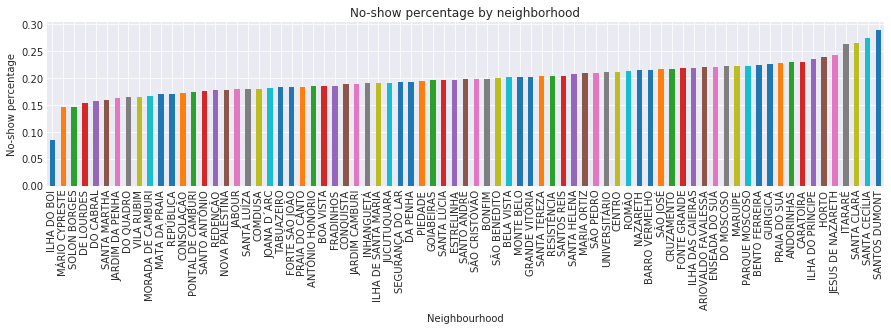

In [78]:
# And plot 

plot_title = 'No-show percentage by neighborhood'
ax = df_nb_sorted['No-show_Binary'].plot(kind='bar', figsize=(15,3), title=(plot_title))
ax.set_ylabel('No-show percentage')


There is a high correlation between neighborhoodand no-shows.

### What is the correlation of days between schedule date and appointment date on no-shows? 

In [79]:
#First drop the time part
df['ScheduledDay'] = df['ScheduledDay'].astype(str).str.slice(start=0, stop=10)
df['AppointmentDay'] = df['AppointmentDay'].astype(str).str.slice(start=0, stop=10)

#convert to datetime and subtract to get the days between schedule and appointment
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])
df['DaysBetween'] = df['AppointmentDay'] - df['ScheduledDay']
df['DaysBetween'] = df['DaysBetween'].dt.days

#group by days between
df_daysbetween = df[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').mean()
df_daysbetween.head()


,No-show_Binary
DaysBetween,
-6,1.000000
-1,1.000000
0,0.046471
1,0.213505
2,0.238216


Text(0.5,0,'Days between scheduling and appointment')

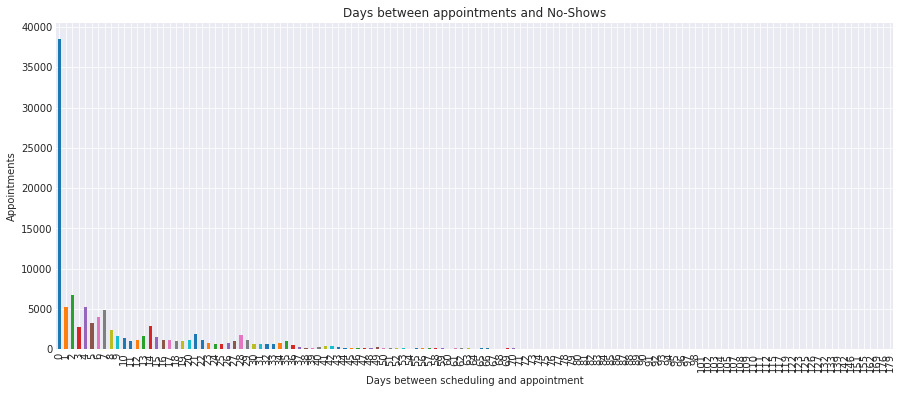

In [80]:
# Should not be negative days. Investigate further: 
df_daysbetween = df.drop(df.index[df.DaysBetween < 0])
df_daysbetween = df_daysbetween[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').count()
plot_title = 'Days between appointments and No-Shows' 
ax = df_daysbetween['No-show_Binary'].plot(kind='bar', figsize=(15, 6), title=plot_title)
ax.set_ylabel('Appointments')
ax.set_xlabel('Days between scheduling and appointment')


Although the same-day no-show rate is obvious, there are a few interesting things to notice .

1. Appointment no show rate incrases rapidly per day betweeen scheduling and the appointment 
2. There is an interesting 7 day (weekly cyle). 

Due to the sample size I decided to ignore anything larger than 28 days or 4 weeks. 

Text(0.5,0,'Days between scheduling and appointment')

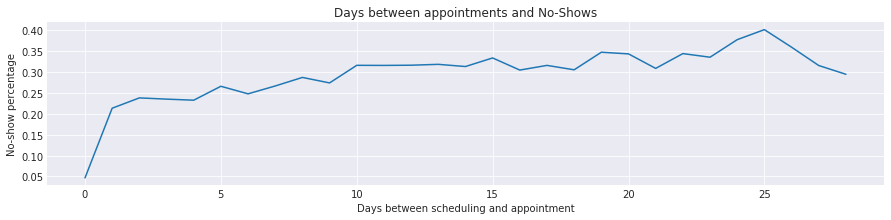

In [81]:
df_daysbetween = df.drop(df.index[df.DaysBetween < 0])
df_daysbetween = df_daysbetween.drop(df_daysbetween.index[df_daysbetween.DaysBetween > 28])
df_daysbetween = df_daysbetween[['No-show_Binary', 'DaysBetween']].groupby('DaysBetween').mean()
ax = df_daysbetween['No-show_Binary'].plot(kind='line', figsize=(15, 3), title=plot_title)
ax.set_ylabel('No-show percentage')
ax.set_xlabel('Days between scheduling and appointment')

We see a large difference here. If the appointment is scheduled on the day of the appointment there is hardly any no-show.Then the no-show percentage increases rapidly. For more than 10 days the no-show percentage is more than 30%.


<a id='conclusions'></a>
# Conclusions

The main question was: what are the most important factors in determining the likelyhood of a no-show. We can draw the following conclusions: 

1. The time between when the appointment is scheduled and the date of the actual is appointment great affects whether the patient will show up for the appointment. 
2. There is a large variation between neighborhoods and no-shows. The lowest being 9% for Ilha Do Boi and up to 29% for Santos Dumont.
3. Patients who recieved an SMS had a no-show percentage of 27% versus 20% overall. 


## Limitations 

Despite the conclusions, here is still no statistical analysis and this study simply checks for correlations between certain events and not causality. For further study it would be itneresting to know what the average travel time for each patient from their respective neighborhoods would be.  

Other limitations include the binary nature of some of the data, for example, it is not clear why some patients recieved an SMS and others did not. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])